<div style="text-align: center; padding: 5px;">
  <h2 style="color: #fa2e05;">Netflix Movies and TV Shows EDA 🍿</h2>
  
  <p style="color: #e8b866;">
    Netflix is the world’s leading premium media streaming platform, hosting thousands of films and TV series in nearly 200 countries and territories. Initially, a mail-order DVD rental service launched in 1997, the company quickly dominated the streaming sphere when it launched its subscription video-on-demand service a decade later in 2007, the same year that Hulu launched. The field has become quite a bit more crowded since then, and Netflix now competes with the likes of Amazon Prime Video, HBO Max, Disney Plus, Apple TV Plus, and many more, including niche streamers like The Criterion Channel and Shudder. — From <a href="https://www.androidauthority.com/what-is-netflix-2-1136891/">Android Authority</a>
  </p>

  <img src="https://help.nflxext.com/0af6ce3e-b27a-4722-a5f0-e32af4df3045_what_is_netflix_5_en.png" alt="" style="width: 75%; padding-top: 10px;"/>
</div>

The main questions that we have to answer in this notebook:

1. What percentage are movies and what percentage are TV shows?
2. Countries with the highest amount of production?
3. What are the types of rating system?
4. The most commonly produced genres?
5. What is the distribution chart of the seasons of the series?
6. What month has the most content added to Netflix?

<div style="text-align: center; padding: 5px;">
  <h2 style="color: #fa2e05;">Warming 🧣</h2>
  
  <p style="color: #e8b866;">
    This section is related to providing the environment and tools we need; from importing things to Bash scripting.<br/>It can be sloppy sometimes here, but overall there is nothing strange!
  </p>
</div>

In [1]:
# Data analysis
import pandas as pd
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Other things
from IPython.display import Markdown

In [5]:
!ls -lh ./datasets | tail -n +2 | tr -s ' ' | cut -d' ' -f1,5,9

-rw-rw-r-- 51K car_evaluation.csv
-rw-rw-r-- 3.3M netflix.csv
-rw-rw-r-- 59K titanic.csv
-rw-rw-r-- 286K used_car_prices.csv
-rw-rw-r-- 60M youtube_trends_us.csv


One time for ever:

In [6]:
def dataframe_overview(df: pd.DataFrame) -> None:
    """Tries to avoid repetitive tasks."""
    display(Markdown('#### **Head of the dataset**'))
    display(df.head())
    
    display(Markdown('#### **Dataframe info**'))
    display(df.info(memory_usage='deep'))
    
    display(Markdown('#### **Memory usage of each column (in megabytes)**'))
    display(df.memory_usage(deep=True) / 1024**2)
    
    display(Markdown('#### **Description of the data**'))
    display(df.describe())
    
    display(Markdown('#### **Status of non-numeric fields**'))
    display(df.describe(include=['O']))
    
    display(Markdown('#### **Number of unique values**'))
    display(df.nunique())

    display(Markdown('#### **Missing values**'))
    display(msno.bar(df))
    display(msno.matrix(df))

In [7]:
sns.set_theme(style='darkgrid', palette='colorblind')

<div style="text-align: center; padding: 5px;">
  <h2 style="color: #fa2e05;">Exploring 🔬</h2>
  
  <p style="color: #e8b866;">
    This section is related to providing the environment and tools we need; from importing things to Bash scripting.<br/>It can be sloppy sometimes here, but overall there is nothing strange!
  </p>
</div>

#### **Head of the dataset**

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### **Dataframe info**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 8.5 MB


None

#### **Memory usage of each column (in megabytes)**

Index           0.000122
show_id         0.519683
type            0.525843
title           0.634566
director        0.515374
cast            1.427493
country         0.554624
date_added      0.602154
release_year    0.067192
rating          0.515879
duration        0.537794
listed_in       0.759319
description     1.863822
dtype: float64

#### **Description of the data**

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### **Status of non-numeric fields**

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


#### **Number of unique values**

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#### **Missing values**

<AxesSubplot: >

<AxesSubplot: >

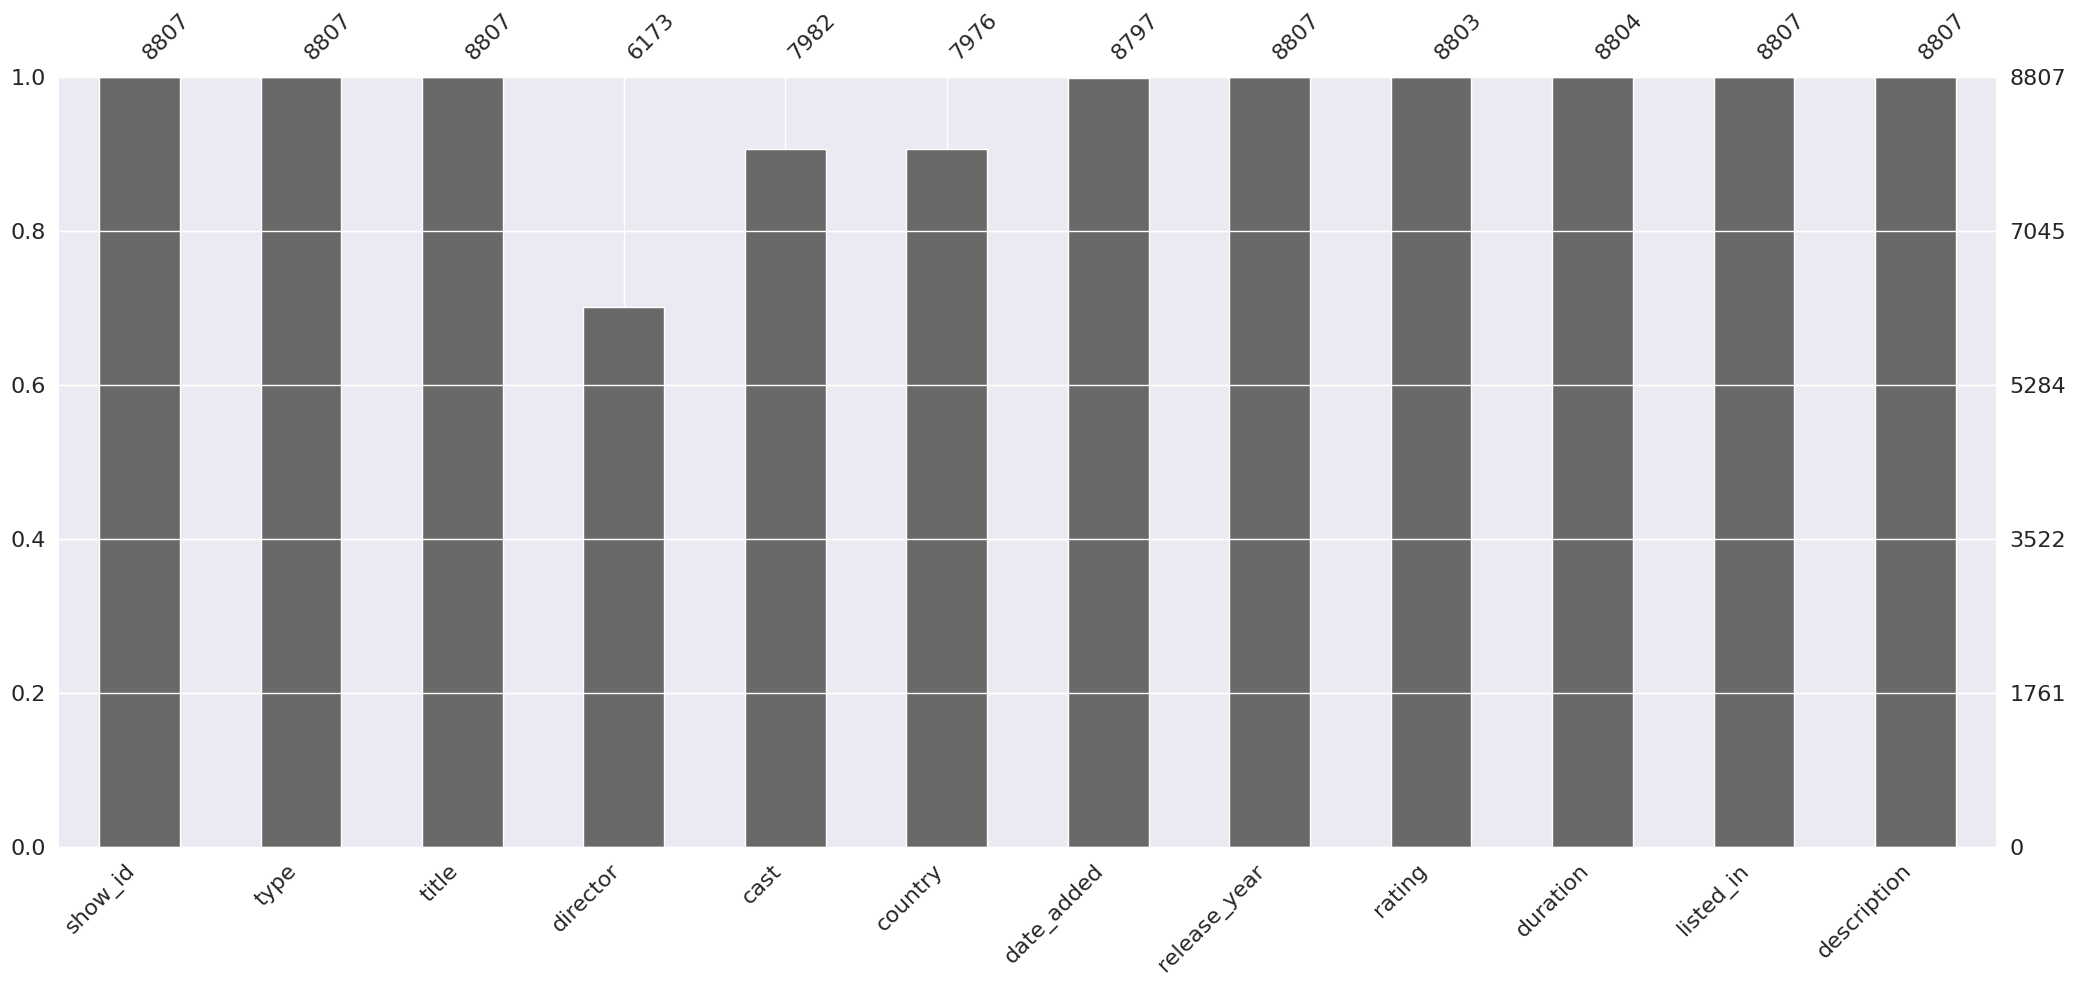

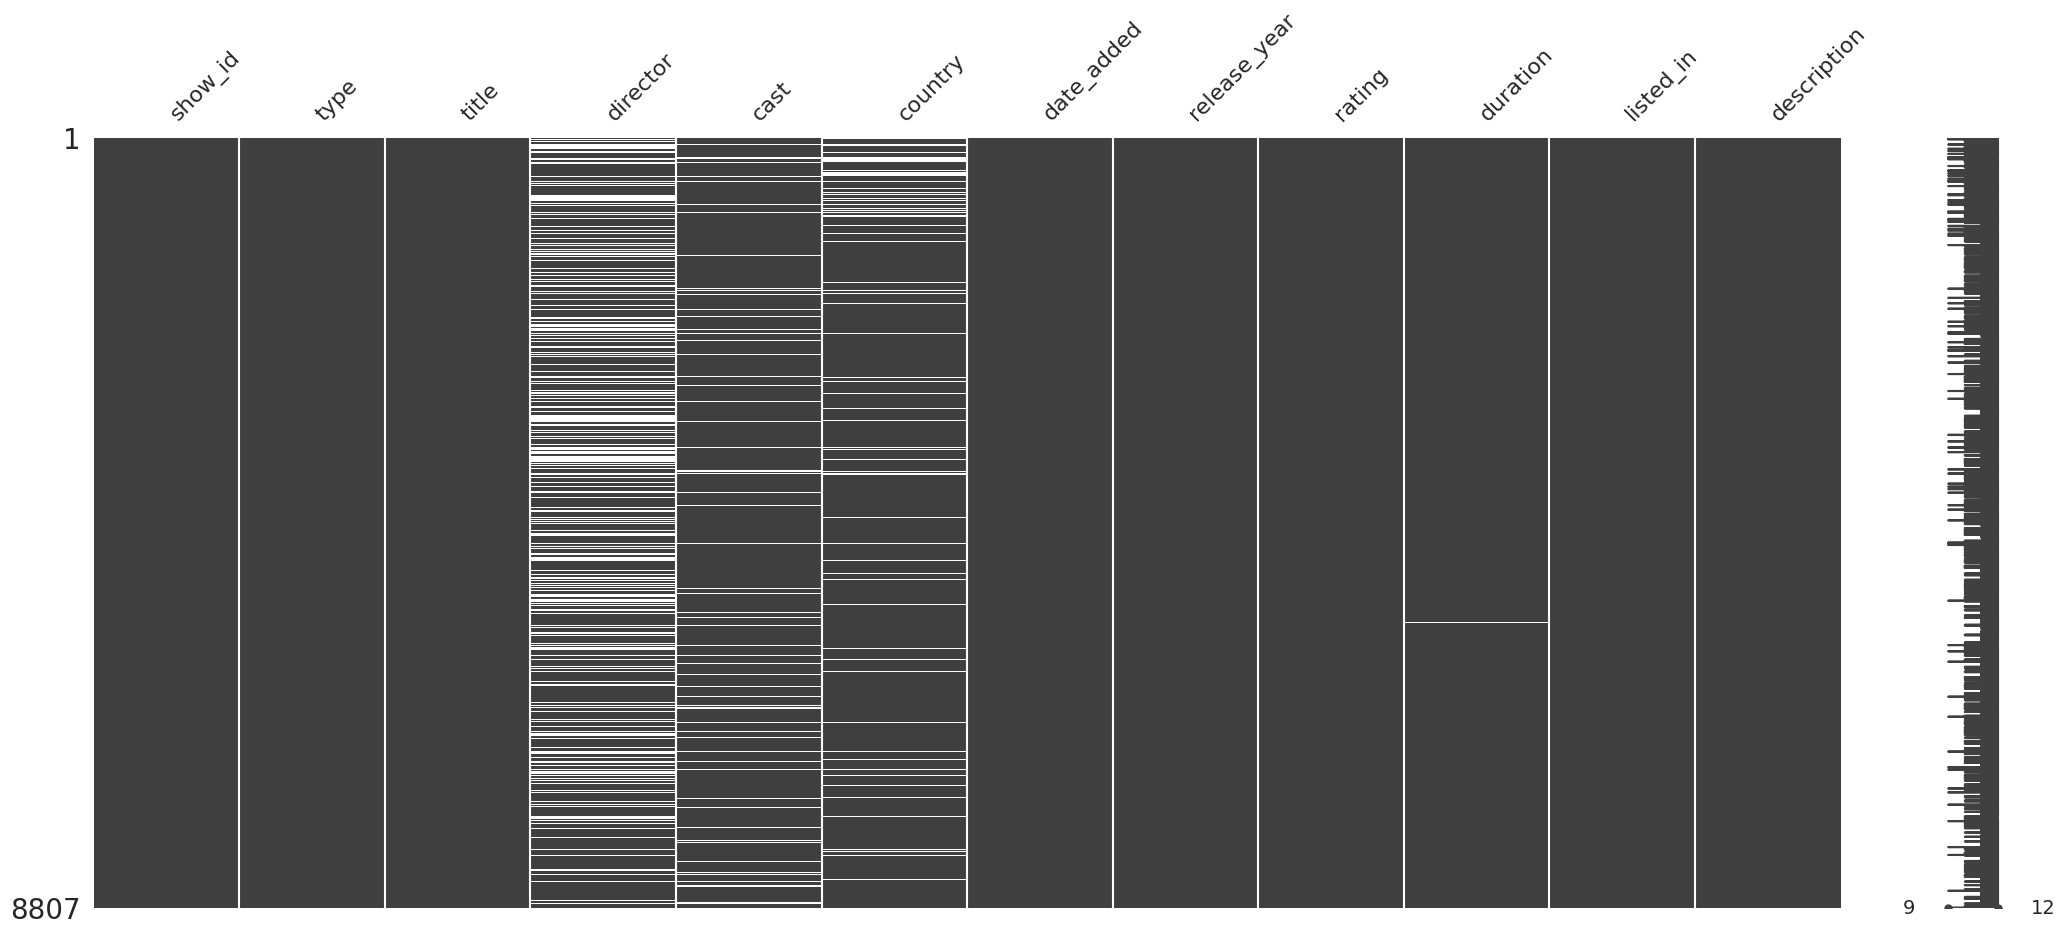

In [8]:
df = pd.read_csv('./datasets/netflix.csv')
dataframe_overview(df)

About the 12 columns of this interesting dataset:

- `show_id`: A unique ID for each show
- `type`: The category of a show — it can be `Movie` or `TV Show`
- `title`: Name of the show
- `director`: Name of the director(s) of the show
- `cast`: Actors involved in the show
- `country`: Country where the show was produced
- `date_added`: Date when the show was added on Netflix
- `release_year`: Release year of the show
- `rating`: TV rating — a content rating system
- `duration`: Time duration — in minutes or number of seasons
- `listed_in`: Genre(s)
- `description`: A summary of the show

### 1. What percentage are movies and what percentage are TV shows?

In [9]:
content_types = df['type'].value_counts()
content_types

Movie      6131
TV Show    2676
Name: type, dtype: int64

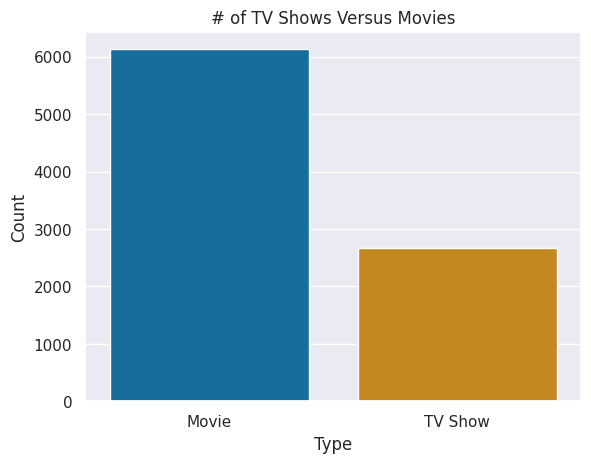

In [10]:
sns.barplot(x=content_types.index, y=content_types.values)  # Also you can use `sns.countplot`
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV Shows Versus Movies')
plt.show()

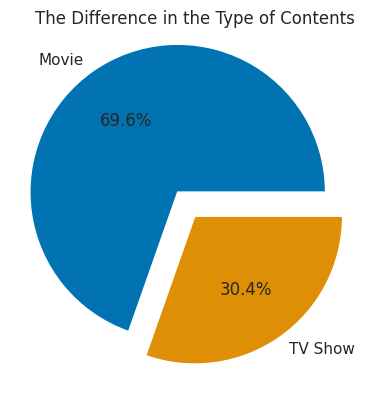

In [11]:
plt.pie(x=content_types.values, labels=content_types.index,
        autopct='%.1f%%', explode=[.2, 0])
plt.title('The Difference in the Type of Contents')
plt.show()

### 2. Countries with the highest amount of production?

In [12]:
top_producing_countries = (
    df['country']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)
top_producing_countries

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

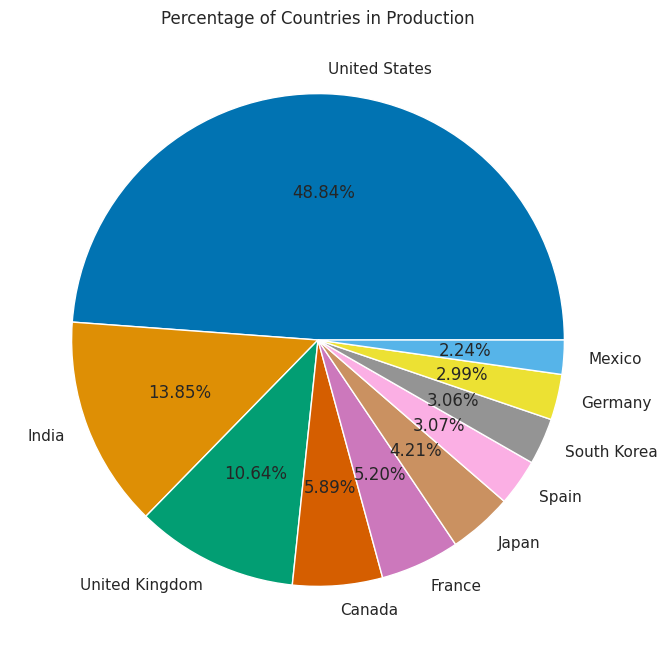

In [13]:
plt.figure(figsize=(9, 8))
plt.pie(x=top_producing_countries.values, labels=top_producing_countries.index, autopct='%.2f%%')
plt.title('Percentage of Countries in Production')
plt.show()

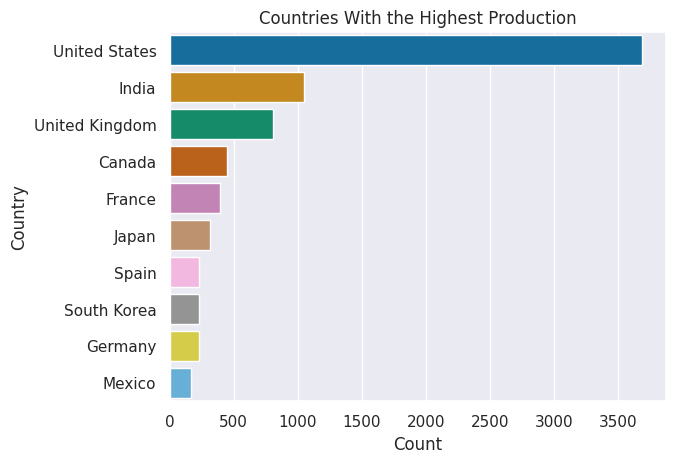

In [14]:
sns.barplot(x=top_producing_countries.values, y=top_producing_countries.index)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Countries With the Highest Production')
plt.show()

### 3. What are the types of rating system?

In [65]:
most_used_ratings = (
    df['rating']
    .value_counts()
    .head(8)
)
most_used_ratings

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
Name: rating, dtype: int64

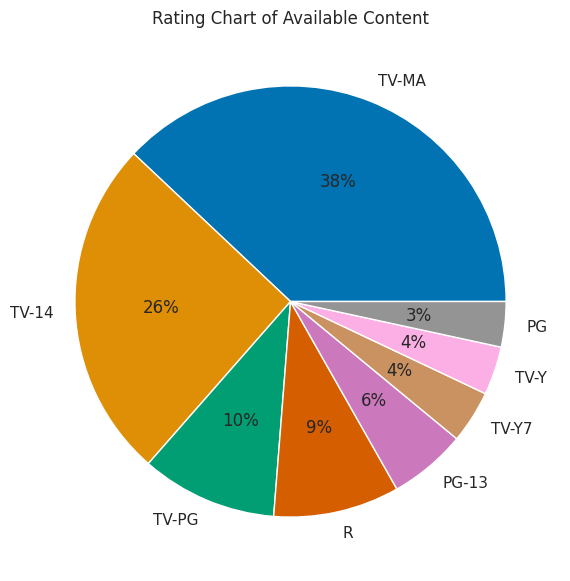

In [66]:
plt.figure(figsize=(8, 7))
plt.pie(x=most_used_ratings.values, labels=most_used_ratings.index, autopct='%.0f%%')
plt.title('Rating Chart of Available Content')
plt.show()

### 4. The most commonly produced genres?

In [ ]:
most_produced_geners = (
  df['listed_in']
  .str.split(', ')
  .explode()
  .value_counts()
  .head(30)
)
most_produced_geners

International Movies         2752
Dramas                       2427
Comedies                     1674
International TV Shows       1351
Documentaries                 869
Action & Adventure            859
TV Dramas                     763
Independent Movies            756
Children & Family Movies      641
Romantic Movies               616
TV Comedies                   581
Thrillers                     577
Crime TV Shows                470
Kids' TV                      451
Docuseries                    395
Music & Musicals              375
Romantic TV Shows             370
Horror Movies                 357
Stand-Up Comedy               343
Reality TV                    255
British TV Shows              253
Sci-Fi & Fantasy              243
Sports Movies                 219
Anime Series                  176
Spanish-Language TV Shows     174
TV Action & Adventure         168
Korean TV Shows               151
Classic Movies                116
LGBTQ Movies                  102
TV Mysteries  

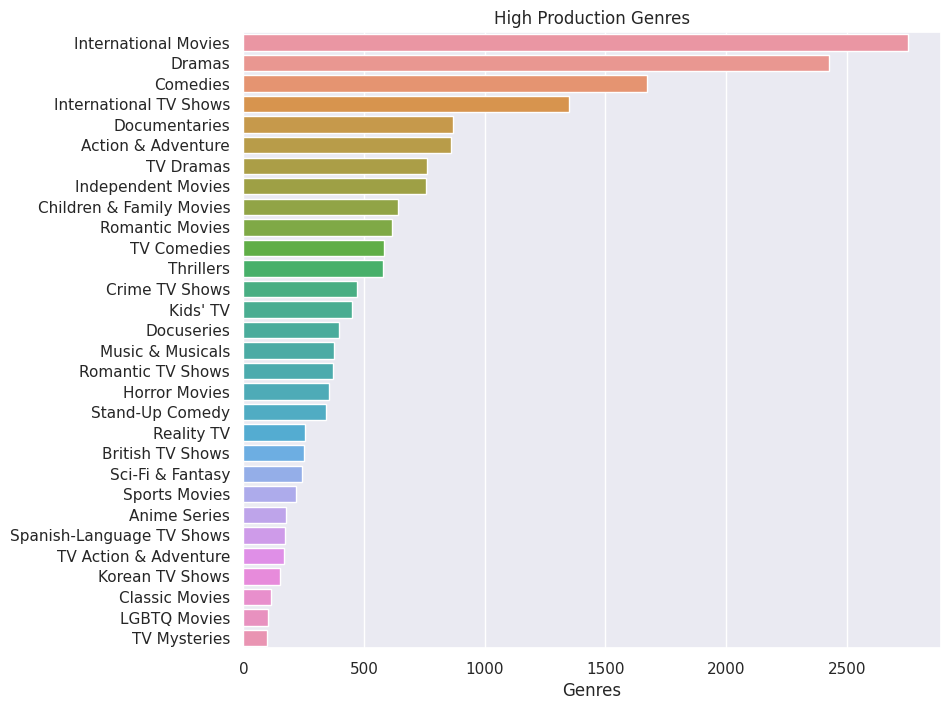

In [ ]:
plt.figure(figsize=(9, 8))
sns.barplot(x=most_produced_geners.values, y=most_produced_geners.index)
plt.xlabel('Genres')
plt.title('High Production Genres')
plt.show()

### 5. What is the distribution chart of the seasons of the series?

In [50]:
serial_contents_seasons = (
    df['duration']
    .str.extract('(\d+)\sSeasons')
    .dropna()
    .astype('int32')
    .value_counts()
)
serial_contents_seasons

2     425
3     199
4      95
5      65
6      33
7      23
8      17
9       9
10      7
13      3
11      2
12      2
15      2
17      1
dtype: int64

Non-dimensionalization of indexes from `MultiIndex`:

In [51]:
serial_contents_seasons.index

MultiIndex([( 2,),
            ( 3,),
            ( 4,),
            ( 5,),
            ( 6,),
            ( 7,),
            ( 8,),
            ( 9,),
            (10,),
            (13,),
            (11,),
            (12,),
            (15,),
            (17,)],
           names=[0])

In [52]:
serial_contents_seasons.index = [i[0] for i in serial_contents_seasons.index]

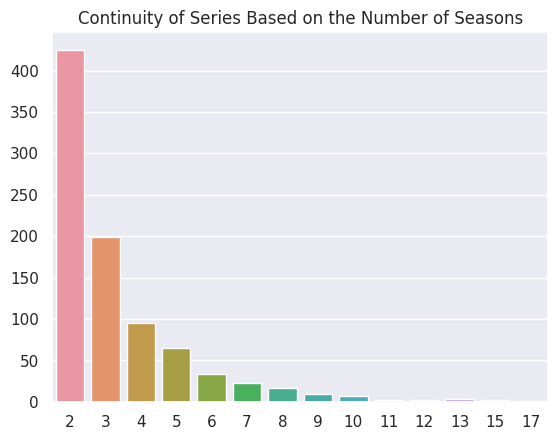

In [53]:
sns.barplot(x=serial_contents_seasons.index, y=serial_contents_seasons.values)
plt.title('Continuity of Series Based on the Number of Seasons')
plt.show()

### 6. What month has the most content added to Netflix?

In [54]:
months_name = (
    pd.to_datetime(df['date_added'])
    .dt.month_name()
)
months_name

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: date_added, Length: 8807, dtype: object

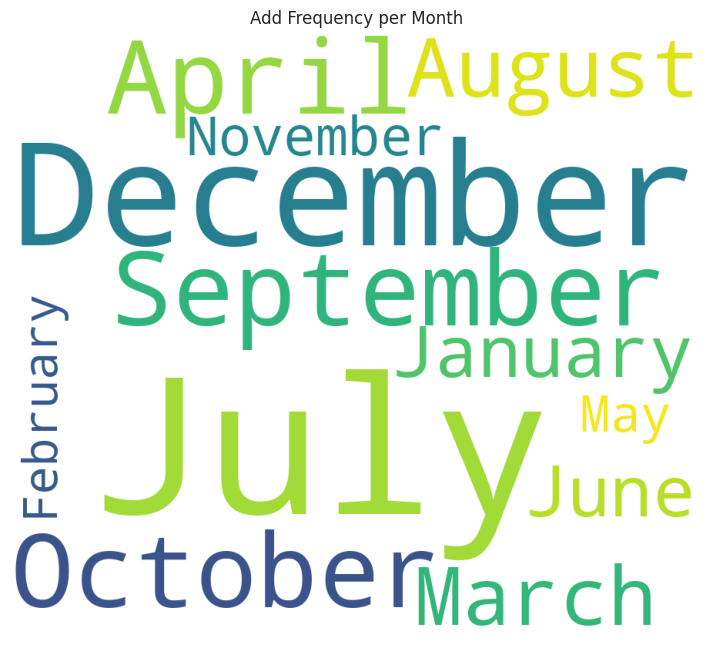

In [55]:
plt.figure(figsize=(9, 8))
wordcloud = (
    WordCloud(width=900, height=800, background_color='white')
    .generate_from_frequencies(months_name.value_counts())
)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Add Frequency per Month')
plt.show()

It wasn't very interesting, let's use something else:

In [56]:
content_type_and_upload_month = (
    pd.concat([df['type'], months_name], axis=1)
    .rename(columns={'date_added': 'month_added'})
    .value_counts()
)
content_type_and_upload_month

type     month_added
Movie    July           565
         April          550
         December       547
         January        546
         October        545
         March          529
         September      519
         August         519
         November       498
         June           492
         May            439
         February       382
TV Show  December       266
         July           262
         September      251
         August         236
         June           236
         October        215
         April          214
         March          213
         November       207
         May            193
         January        192
         February       181
dtype: int64

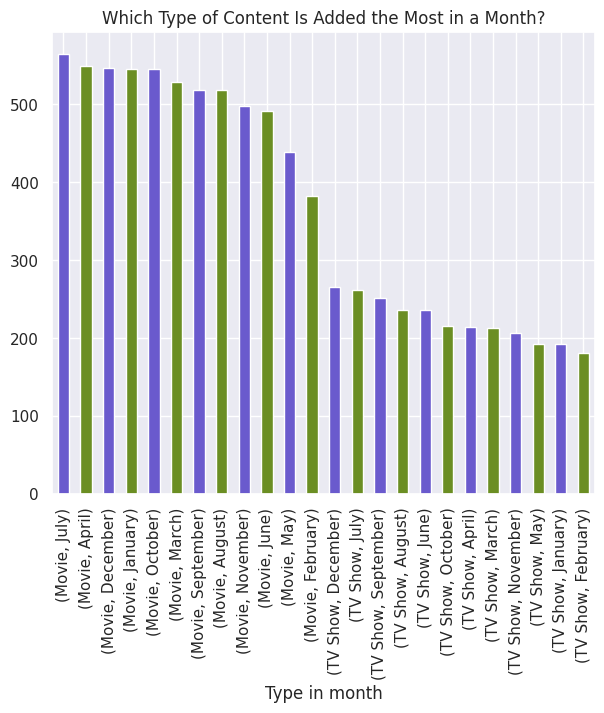

In [57]:
plt.figure(figsize=(7, 6))
content_type_and_upload_month.plot(kind='bar', stacked=True, color=['slateblue', 'olivedrab'])
plt.xlabel('Type in month')
plt.title('Which Type of Content Is Added the Most in a Month?')
plt.show()

I don't want this stacking...

In [58]:
content_type_and_upload_month_df = (  # Oh, the names...
    content_type_and_upload_month
    .reset_index()
    .rename(columns={0: 'count'})
)
content_type_and_upload_month_df

,type,month_added,count
0,Movie,July,565
1,Movie,April,550
2,Movie,December,547
3,Movie,January,546
4,Movie,October,545
5,Movie,March,529
6,Movie,September,519
7,Movie,August,519
8,Movie,November,498
9,Movie,June,492


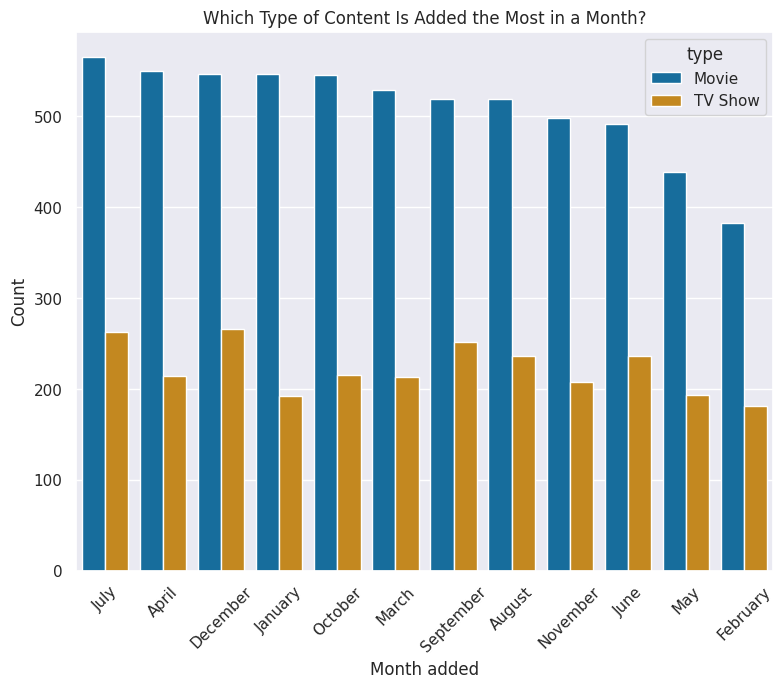

In [59]:
plt.figure(figsize=(9, 7))
sns.barplot(data=content_type_and_upload_month_df, x='month_added', y='count', hue='type')
plt.xticks(rotation=45)
plt.xlabel('Month added')
plt.ylabel('Count')
plt.title('Which Type of Content Is Added the Most in a Month?')
plt.show()

In [60]:
top_release_years = (
    df['release_year']
    .value_counts()
    .head(15)
)
top_release_years

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: release_year, dtype: int64

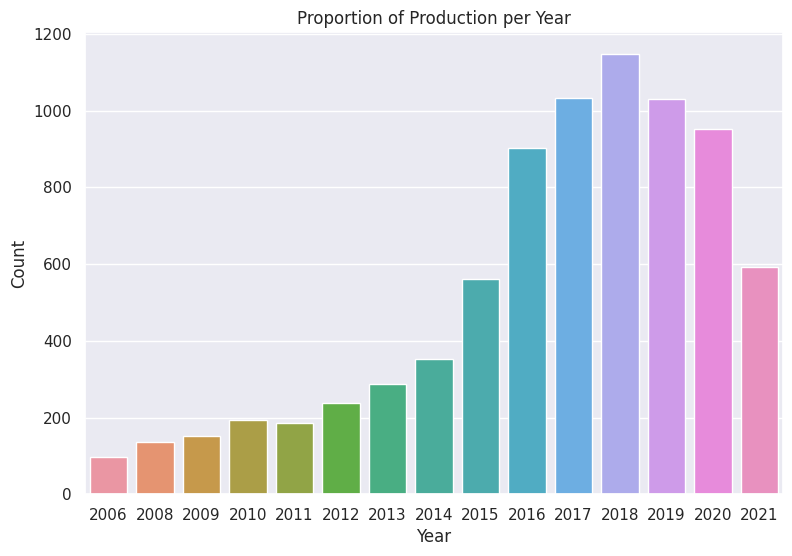

In [61]:
plt.figure(figsize=(9, 6))
sns.barplot(x=top_release_years.index, y=top_release_years.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Proportion of Production per Year')  # In APA style
plt.show()

<div style="text-align: center; padding: 5px;">
  <h2 style="color: #fa2e05;">Modeling 🤖</h2>
  
  <p style="color: #e8b866;">
    In this part, we try to do things with artificial intelligence; These tasks can be classifying content or even predicting prices.
  </p>
</div>